
##Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
a. Import the necessary packages
b. Load the training and testing data
c. Define the network architecture using Keras
d. Train the model using SGD/Adam optimizer
e. Evaluate the network
f. Plot the training loss and accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [2]:
((xtrain, ytrain), (xtest, ytest)) = cifar10.load_data()
print(xtrain.shape, xtest.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
xtrain = xtrain/255.0
xtest = xtest/255.0

In [8]:
xtrain = xtrain.reshape(xtrain.shape[0], -1)
xtest = xtest.reshape(xtest.shape[0], -1)

In [10]:
ytrain = ytrain.flatten()
ytest = ytest.flatten()


In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(3072,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                196672    
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 199082 (777.66 KB)
Trainable params: 199082 (777.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
h = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=11)

Epoch 1/11
1563/1563 [==============================] - 12s 5ms/step - loss: 1.9091 - accuracy: 0.3033 - val_loss: 1.7652 - val_accuracy: 0.3590
Epoch 2/11
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7554 - accuracy: 0.3681 - val_loss: 1.7085 - val_accuracy: 0.3812
Epoch 3/11
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6976 - accuracy: 0.3898 - val_loss: 1.6508 - val_accuracy: 0.4133
Epoch 4/11
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6623 - accuracy: 0.4021 - val_loss: 1.6457 - val_accuracy: 0.4116
Epoch 5/11
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6379 - accuracy: 0.4123 - val_loss: 1.6337 - val_accuracy: 0.4196
Epoch 6/11
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6188 - accuracy: 0.4199 - val_loss: 1.6591 - val_accuracy: 0.4117
Epoch 7/11
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6050 - accuracy: 0.4226 - val_loss: 1.6042 - val_accuracy

In [16]:
from sklearn.metrics import classification_report as cf
preds = model.predict(xtest)
print(cf(ytest, preds.argmax(axis=1)))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.45      0.56      0.50      1000
           1       0.44      0.64      0.52      1000
           2       0.30      0.29      0.30      1000
           3       0.30      0.32      0.31      1000
           4       0.40      0.32      0.36      1000
           5       0.38      0.30      0.33      1000
           6       0.43      0.50      0.46      1000
           7       0.51      0.46      0.48      1000
           8       0.57      0.54      0.55      1000
           9       0.54      0.38      0.45      1000

    accuracy                           0.43     10000
   macro avg       0.43      0.43      0.43     10000
weighted avg       0.43      0.43      0.43     10000



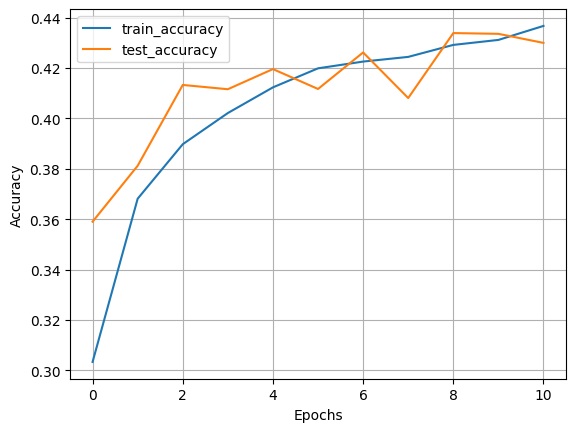

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(0,11),h.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,11),h.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

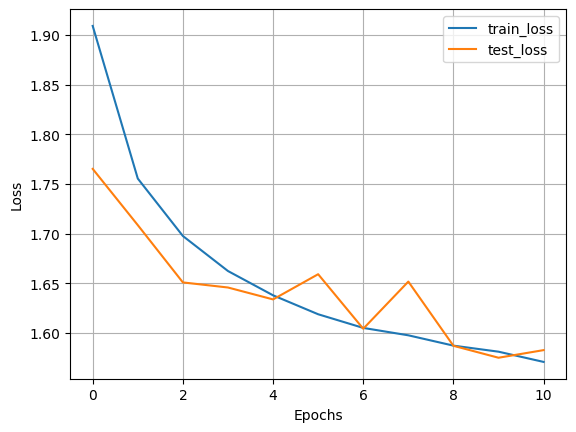

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(0,11),h.history['loss'],label = 'train_loss')
plt.plot(range(0,11),h.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();